In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Tue Sep 30 13:12:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
w = 0.7
b = 1

start = 1
end=2
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X*w + b
X[:10], y[:10]

(tensor([[1.0000],
         [1.0200],
         [1.0400],
         [1.0600],
         [1.0800],
         [1.1000],
         [1.1200],
         [1.1400],
         [1.1600],
         [1.1800]]),
 tensor([[1.7000],
         [1.7140],
         [1.7280],
         [1.7420],
         [1.7560],
         [1.7700],
         [1.7840],
         [1.7980],
         [1.8120],
         [1.8260]]))

In [5]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [6]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

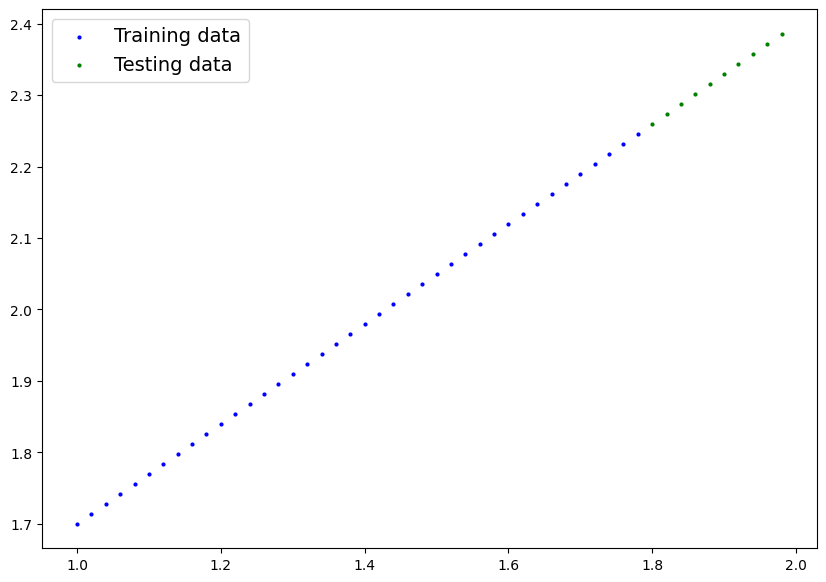

In [7]:
plot_predictions()

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self,):
     super().__init__()
     self.linear_layer = nn.Linear(in_features=1,
                                   out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0 , model_0.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
model_0.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [10]:
loss_func = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [11]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_func(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_func(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Train: {loss.item():.4f} | Test: {test_loss.item():.4f}")

Epoch 0 | Train: 0.0803 | Test: 0.0117
Epoch 10 | Train: 0.0193 | Test: 0.0448
Epoch 20 | Train: 0.0180 | Test: 0.0418
Epoch 30 | Train: 0.0166 | Test: 0.0370
Epoch 40 | Train: 0.0153 | Test: 0.0340
Epoch 50 | Train: 0.0140 | Test: 0.0310
Epoch 60 | Train: 0.0126 | Test: 0.0280
Epoch 70 | Train: 0.0113 | Test: 0.0250
Epoch 80 | Train: 0.0099 | Test: 0.0221
Epoch 90 | Train: 0.0086 | Test: 0.0191
Epoch 100 | Train: 0.0074 | Test: 0.0181
Epoch 110 | Train: 0.0133 | Test: 0.0354
Epoch 120 | Train: 0.0133 | Test: 0.0354
Epoch 130 | Train: 0.0133 | Test: 0.0354
Epoch 140 | Train: 0.0133 | Test: 0.0354
Epoch 150 | Train: 0.0133 | Test: 0.0354
Epoch 160 | Train: 0.0133 | Test: 0.0354
Epoch 170 | Train: 0.0133 | Test: 0.0354
Epoch 180 | Train: 0.0133 | Test: 0.0354
Epoch 190 | Train: 0.0133 | Test: 0.0354


In [12]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7249]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9520], device='cuda:0'))])

In [17]:
model_0.eval()

with torch.inference_mode():
  y_pred = model_0(X_test)
y_pred

tensor([[2.2569],
        [2.2714],
        [2.2859],
        [2.3004],
        [2.3149],
        [2.3294],
        [2.3439],
        [2.3584],
        [2.3729],
        [2.3874]], device='cuda:0')

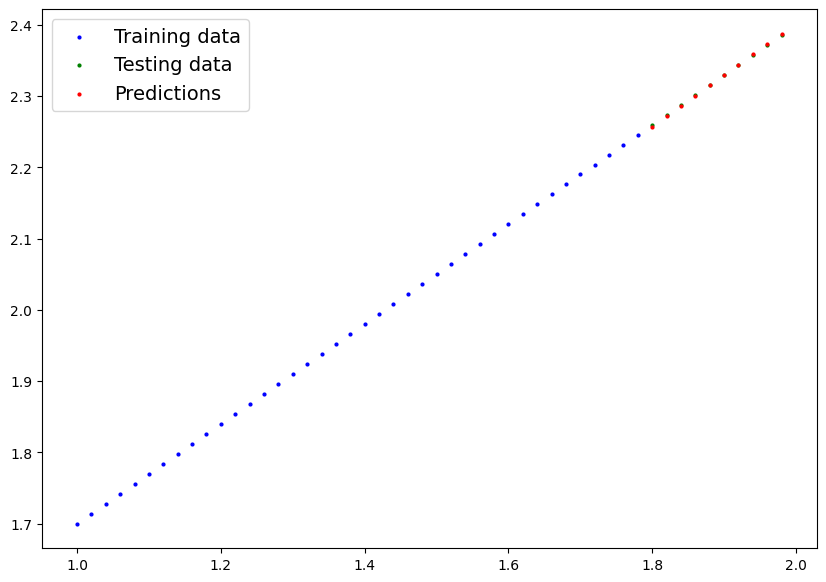

In [18]:
plot_predictions(predictions=y_pred.cpu())

In [23]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [26]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [27]:
loaded_model_0.eval()

with torch.inference_mode():
  y_pred = loaded_model_0(X_test)
y_pred

tensor([[2.2569],
        [2.2714],
        [2.2859],
        [2.3004],
        [2.3149],
        [2.3294],
        [2.3439],
        [2.3584],
        [2.3729],
        [2.3874]], device='cuda:0')

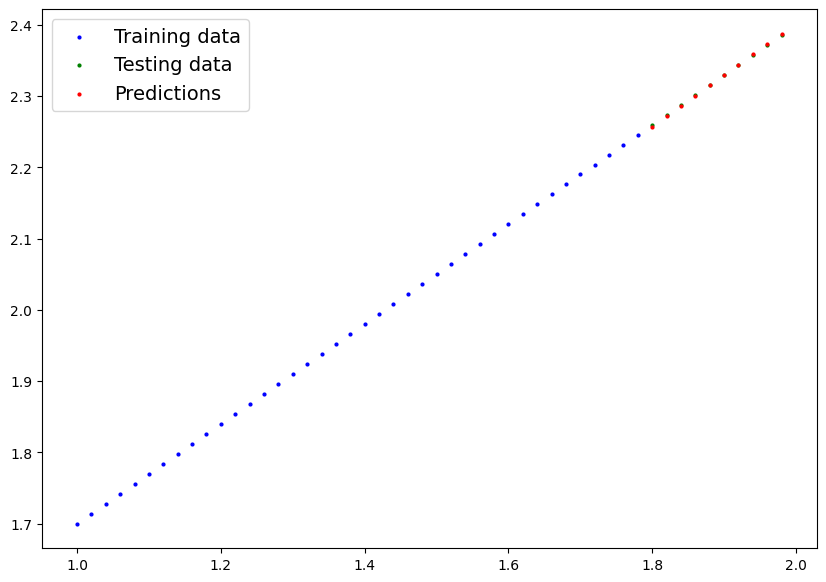

In [28]:
plot_predictions(predictions=y_pred.cpu())